# Computer Vision Project: Automatic Image Captioning

Load and pre-process data from the [COCO dataset](http://cocodataset.org/#home). 
Design a CNN-RNN model for automatically generating image captions.

In [2]:
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
!pip3 install nltk
import nltk
nltk.download('punkt')
from data_loader import get_loader
from torchvision import transforms

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package punkt to C:\Users\Maaz
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Pre-processing

In [3]:
#Define a transform to pre-process the training images.
transform_train = transforms.Compose([
    transforms.Resize(256),                         # smaller edge if image resized to 256
    transforms.RandomCrop(224),                     # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),              # horizontally flip image with probability=0.5
    transforms.ToTensor(),                          # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),     # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))
])

In [7]:
# Set the minimum word count threshold.
vocab_threshold = 5

# Specify the batch size.
batch_size = 10

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=True)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=2.60s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [01:00<00:00, 6833.89it/s] 


#### Image Pre-Processing 

```python
# Convert image to tensor and pre-process using transform
image = Image.open(os.path.join(self.img_folder, path)).convert('RGB')
image = self.transform(image)
```

#### Caption Pre-Processing 

```python
# Convert caption to tensor of word ids.
tokens = nltk.tokenize.word_tokenize(str(caption).lower())   # line 1
caption = []                                                 # line 2
caption.append(self.vocab(self.vocab.start_word))            # line 3
caption.extend([self.vocab(token) for token in tokens])      # line 4
caption.append(self.vocab(self.vocab.end_word))              # line 5
caption = torch.Tensor(caption).long()                       # line 6
```

In [8]:
sample_caption = 'A person doing a trick on a rail while riding a skateboard.'

In [9]:
sample_tokens = nltk.tokenize.word_tokenize(str(sample_caption).lower())
print(sample_tokens)
sample_caption = []
start_word = data_loader.dataset.vocab.start_word
print('Special Start Word:', start_word)
sample_caption.append(data_loader.dataset.vocab(start_word))
print(sample_caption)

['a', 'person', 'doing', 'a', 'trick', 'on', 'a', 'rail', 'while', 'riding', 'a', 'skateboard', '.']
Special Start Word: <start>
[0]


In [10]:
sample_caption.extend([data_loader.dataset.vocab(token) for token in sample_tokens])
print(sample_caption)

[0, 3, 98, 754, 3, 396, 39, 3, 1010, 207, 139, 3, 753, 18]


In [11]:
end_word = data_loader.dataset.vocab.end_word
print('Special End Word:', end_word)

sample_caption.append(data_loader.dataset.vocab(end_word))
print(sample_caption)

Special End Word: <end>
[0, 3, 98, 754, 3, 396, 39, 3, 1010, 207, 139, 3, 753, 18, 1]


In [12]:
import torch
sample_caption = torch.Tensor(sample_caption).long()
print(sample_caption)

tensor([   0,    3,   98,  754,    3,  396,   39,    3, 1010,  207,  139,    3,
         753,   18,    1])


In [13]:
# Preview the word2idx dictionary.
dict(list(data_loader.dataset.vocab.word2idx.items())[:10])

{'<start>': 0,
 '<end>': 1,
 '<unk>': 2,
 'a': 3,
 'very': 4,
 'clean': 5,
 'and': 6,
 'well': 7,
 'decorated': 8,
 'empty': 9}

In [14]:
# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

Total number of tokens in vocabulary: 8852


In [15]:
unk_word = data_loader.dataset.vocab.unk_word
print('Special unknown word:', unk_word)

print('All unknown words are mapped to this integer:', data_loader.dataset.vocab(unk_word))

Special unknown word: <unk>
All unknown words are mapped to this integer: 2


In [16]:
# Obtain the data loader (from file). Note that it runs much faster than before!
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_from_file=True)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...


Done (t=1.06s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:46<00:00, 8975.06it/s] 


In [17]:
from collections import Counter

# Tally the total number of training captions with each length.
counter = Counter(data_loader.dataset.caption_lengths)
lengths = sorted(counter.items(), key=lambda pair: pair[1], reverse= True)
for value, count in lengths:
    print('value: %2d --- count: %5d' % (value, count))

value: 10 --- count: 86302
value: 11 --- count: 79971
value:  9 --- count: 71920
value: 12 --- count: 57653
value: 13 --- count: 37668
value: 14 --- count: 22342
value:  8 --- count: 20742
value: 15 --- count: 12839
value: 16 --- count:  7736
value: 17 --- count:  4845
value: 18 --- count:  3101
value: 19 --- count:  2017
value:  7 --- count:  1594
value: 20 --- count:  1453
value: 21 --- count:   997
value: 22 --- count:   683
value: 23 --- count:   534
value: 24 --- count:   384
value: 25 --- count:   277
value: 26 --- count:   214
value: 27 --- count:   160
value: 28 --- count:   114
value: 29 --- count:    87
value: 30 --- count:    58
value: 31 --- count:    49
value: 32 --- count:    44
value: 34 --- count:    40
value: 37 --- count:    32
value: 35 --- count:    31
value: 33 --- count:    30
value: 36 --- count:    26
value: 38 --- count:    18
value: 39 --- count:    18
value: 43 --- count:    16
value: 44 --- count:    16
value: 48 --- count:    12
value: 45 --- count:    11
v

### Generate Batches

In [18]:
import numpy as np
import torch.utils.data as data

# Randomly sample a caption length, and sample indices with that length.
indices = data_loader.dataset.get_train_indices()
print('sampled indices:', indices)

# Create and assign a batch sampler to retrieve a batch with the sampled indices.
new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
data_loader.batch_sampler.sampler = new_sampler

# Obtain the batch.
images, captions = next(iter(data_loader))

print('Images.shape:', images.shape)
print('captions.shape:', captions.shape)

# (Optional) Uncomment the lines of code below to print the pre-processed images and captions.
print('images:', images)
print('captions:', captions)

sampled indices: [93278, 129836, 339066, 324894, 22139, 313067, 168289, 407671, 265630, 69915]
Images.shape: torch.Size([10, 3, 224, 224])
captions.shape: torch.Size([10, 11])
images: tensor([[[[ 0.8447,  0.8618,  0.8789,  ...,  0.8276,  0.8104,  0.8104],
          [ 0.7591,  0.8276,  0.8789,  ...,  0.8276,  0.8104,  0.7591],
          [ 0.6906,  0.7591,  0.7933,  ...,  0.7077,  0.6906,  0.6563],
          ...,
          [ 0.7419,  0.6221,  0.6906,  ...,  1.4269,  1.4269,  1.4269],
          [ 0.7591,  0.7762,  0.8789,  ...,  1.3242,  1.2899,  1.4098],
          [ 0.9988,  0.9646,  0.9646,  ...,  1.3584,  1.4098,  1.3413]],

         [[ 1.0980,  1.1155,  1.1681,  ...,  1.1331,  1.1506,  1.1506],
          [ 1.0980,  1.1155,  1.1681,  ...,  1.0980,  1.0980,  1.0805],
          [ 1.0805,  1.0980,  1.1155,  ...,  0.9755,  0.9580,  0.9405],
          ...,
          [ 0.5028,  0.3803,  0.4503,  ...,  1.0805,  1.0805,  1.0980],
          [ 0.4853,  0.5203,  0.6078,  ...,  0.9930,  0.9405,  1

### Convolutional Neural Network (CNN) Encoder

In [21]:
# Import EncoderCNN and DecoderRNN. 
from model import EncoderCNN, DecoderRNN

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [23]:
# Specify the dimensionality of the image embedding.
embed_size = 256

# Initialize the encoder.
encoder = EncoderCNN(embed_size)

# Move the encoder to GPU if CUDA is available.
encoder.to(device)

# Move last batch of images to GPU.
images = images.to(device)

# Pass the images through the encoder.
features = encoder(images)

print('type(features):', type(features))
print('features.shape:', features.shape)

d:\ProgramData\anaconda3\envs\pyDL\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\ProgramData\anaconda3\envs\pyDL\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Maaz Ali/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [02:03<00:00, 833kB/s] 


type(features): <class 'torch.Tensor'>
features.shape: torch.Size([10, 256])


### Recurrent Neural Network (RNN) Decoder

In [25]:
# Specify the number of features in the hidden state of the RNN decoder.
hidden_size = 512

# Store the size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the decoder.
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move the decoder to GPU.
decoder.to(device)
    
# Move last batch of captions to GPU. 
captions = captions.to(device)

# Pass the encoder output and captions through the decoder.
outputs = decoder(features, captions)

print('type(outputs):', type(outputs))
print('outputs.shape:', outputs.shape)

type(outputs): <class 'torch.Tensor'>
outputs.shape: torch.Size([10, 11, 8852])


### Training Setup

In [26]:
import math

# Select appropriate values for the Python variables below.
batch_size = 128          # batch size
vocab_threshold = 5        # minimum word count threshold
vocab_from_file = False    # if True, load existing vocab file
embed_size = 300          # dimensionality of image and word embeddings
hidden_size = 512         # number of features in hidden state of the RNN decoder
num_epochs = 3             # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 100          # determines window for printing average loss
log_file = 'training_log.txt'       # name of file with saved training loss and perplexity


In [27]:
# The image transform below.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

In [28]:
# Build data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)

loading annotations into memory...
Done (t=2.65s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=1.72s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [01:24<00:00, 4922.86it/s]


In [29]:
import torch.nn as nn

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder. 
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move models to GPU if CUDA is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function. 
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

d:\ProgramData\anaconda3\envs\pyDL\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\ProgramData\anaconda3\envs\pyDL\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [30]:
# Specify the learnable parameters of the model.
params = list(decoder.parameters()) + list(encoder.embed.parameters())

# Define the optimizer.
optimizer = torch.optim.Adam(params = params, lr = 0.001)

# Set the total number of training steps per epoch.
total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)

### Model Training 

In [31]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time

In [35]:
# Open the training log file.
f = open(log_file, 'w')

old_time = time.time()
#response = requests.request("GET", "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token", headers={"Metadata-Flavor":"Google"})

for epoch in range(1, num_epochs+1):
    
    for i_step in range(1, total_step+1):
        
        if time.time() - old_time > 60:
            old_time = time.time()
            #requests.request("POST", "https://nebula.udacity.com/api/v1/remote/keep-alive", headers={'Authorization': "STAR " + response.text})
            
        # Randomly sample a caption length, and sample idices wirh that length.
        indices = data_loader.dataset.get_train_indices()

        # Create and assgn a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler

        # Move batch of images abd captions to GPU.
        images = images.to(device)
        captions = captions.to(device)

        # Zero the gradients.
        decoder.zero_grad()
        encoder.zero_grad()

        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions)
        
        # Calculate the batch loss.
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        
        # Backward pass.
        loss.backward()
        
        # Update the parameters in the optimizer.
        optimizer.step()
            
        # Get training statistics.
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()
        
        # Print training statistics to file.
        f.write(stats + '\n')
        f.flush()
        
        # Print training statistics (on different line).
        if i_step % print_every == 0:
            print('\r' + stats)
            
    # Save the weights.
    if epoch % save_every == 0:
        torch.save(decoder.state_dict(), os.path.join('./models', 'decoder-%d.pkl' % epoch))
        torch.save(encoder.state_dict(), os.path.join('./models', 'encoder-%d.pkl' % epoch))

# Close the training log file.
f.close()




Epoch [1/3], Step [100/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [200/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [300/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [400/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [500/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [600/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [700/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [800/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [900/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [1000/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [1100/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [1200/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [1300/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [1400/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [1500/3236], Loss: 0.0000, Perplexity: 1.0000
Epoch [1/3], Step [1600/3236], Loss: 0.0000, Perp

### Model Testing

In [36]:
# Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])


In [38]:
# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')

Vocabulary successfully loaded from vocab.pkl file!


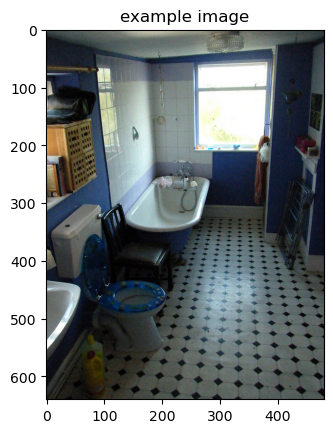

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

### Load Trained Models

In [43]:
# Specify the saved models to load.
encoder_file = "encoder-3.pkl"
decoder_file = "decoder-3.pkl"


In [44]:
# Select appropriate values for the Python variables below.
embed_size = 300
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

In [45]:
# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

d:\ProgramData\anaconda3\envs\pyDL\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\ProgramData\anaconda3\envs\pyDL\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DecoderRNN(
  (embed): Embedding(8852, 300)
  (lstm): LSTM(300, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=8852, bias=True)
)

In [47]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

example output: [0, 3, 20, 57, 6, 56, 77, 3, 28, 18, 1, 1, 1, 18, 1, 1, 1, 18, 1, 1]


### Clean up the Captions

In [48]:
def clean_sentence(output):
    cleaned_list = []
    for index in output:
        if (index == 1):
            continue
        cleaned_list.append(data_loader.dataset.vocab.idx2word[index])

    cleaned_list = cleaned_list[1:-1]       # Discard <start> and <end> words
    sentence = ' '.join(cleaned_list)       # Convert list of string to full string
    sentence = sentence.capitalize()

    return sentence

In [49]:
sentence = clean_sentence(output)
print('example sentence: ', sentence)

example sentence:  A white toilet and sink in a room . .


### Generate Predictions

In [51]:
def get_predictions():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()

    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)
    sentence = clean_sentence(output)
    print(sentence)

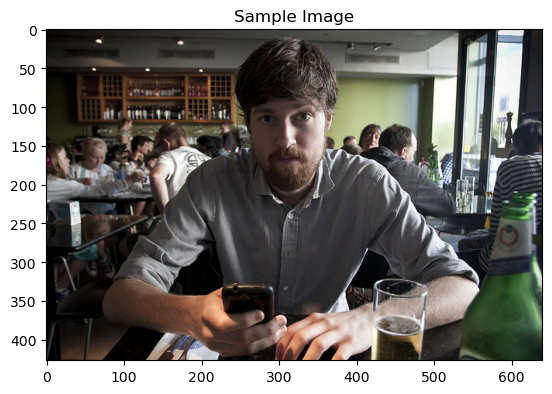

A young boy dresses up like a businessman . .


In [66]:
get_predictions()

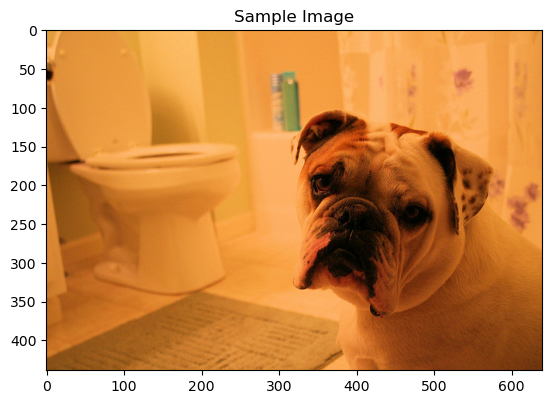

A white toilet and sink in a room . .


In [70]:
get_predictions()

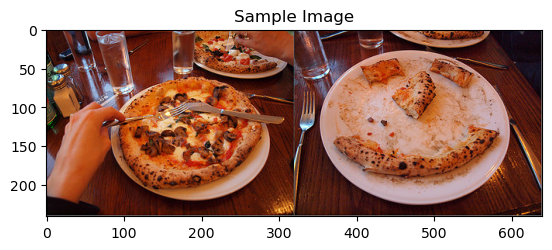

A man with a surfboard on a beach . .


In [77]:
get_predictions()